# Исследование объявлений о продаже квартир

ОПИСАНИЕ ПРОЕКТА:

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

ОПИСАНИЕ ДАННЫХ:

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

ЦЕЛЬ ПРОЕКТА:

Найти интересные особенности и зависимости, которые существуют на рынке недвижимости

ПЛАН:

Обзор данных

Предобработка данных

Добавление в таблицу новых столбцов

Исследовательский анализ данных

Общий вывод

## Обзор данных

Импортируем библиотеки. Считаем данные из csv-файла в датафрейм и сохраним в переменную data. Выведем первые 10 строк таблицы

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [ ]:
data.head(10) # выедем значение первых десяти строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрим общую информацию о полученном датафрейме с помощью метода `info()`

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data.duplicated().sum() #посмотрим, есть ли явные дубликаты в таблице

0

Построим гисторгаммы

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

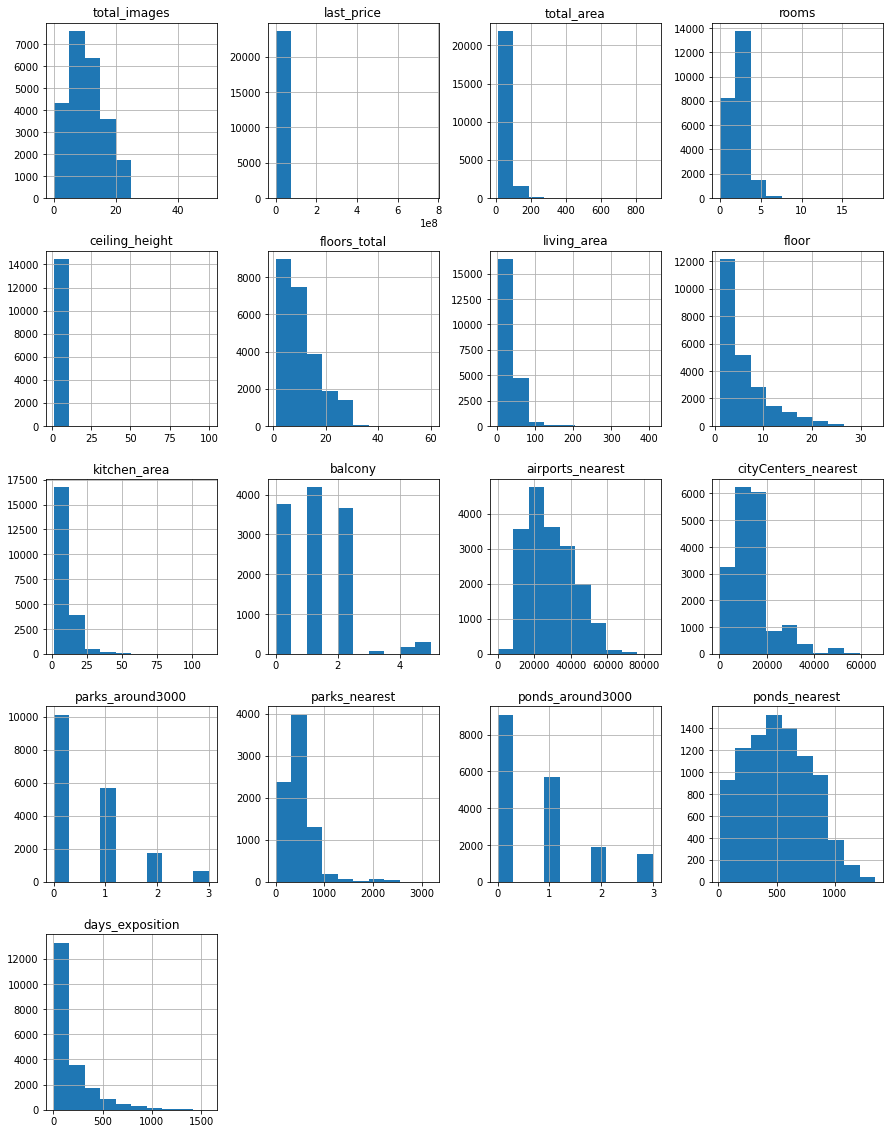

In [ ]:
data.hist(figsize=(15, 20))

**Вывод**

Из общей информации видно, что в датафрейме содержится 23699 строк и 22 колонки.

Пропущены значения в следующих столбцах:
- `ceiling_height`
- `floors_total`
- `living_area`
- `is_apartment`
- `kitchen_area`
- `balcony`
- `locality_name`
- `airports_nearest`
- `parks_around3000`
- `parks_nearest`
- `ponds_around3000`
- `ponds_nearest`
- `days_exposition`

Необходимо изменить типы данных в следующих столбцах:
-`first_day_exposition` - object - должен быть тип datetime
-`floors_total` - float - должен быть тип int
-`balcony` - float - должен быть тип int

## Предобработка данных

### Предварительный анализ данных

**Выведем количество пропущенных значений для каждого столбца**

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбце `ceiling_height` пропущено 9195 значений, скорее всего это связано с тем, что человек, подающий заявление не заполнил данную графу, поскольку не знает высоту потолка в квартире, или посчитал, что данный критерий не важен. *Так как пропущено около 30% значеий, необходимо заменить пропуски на медианную высоту*

В столбце `floors_total` пропущено 86 значений, удалим эти данные. Также изменим тип данных на `int`, поскольку число этажей - это целое число

В столбце `living_area` 1903 ячейки не заполнены, причиной может быть невнесение данных сведений, поскольку человек не знает точную площадь своей квартиры. Общую площадь посчитаем как долю от общей площади квартиры, выяснив медианным значением для аналогичных квартир величину доли.

столбец `is_apartment` вовсе незаполнен, либо все жилые помещения являются квартирами и данный параментр решили не заполнять все продавцы, либо данного параметра не было на момент подачи ими объявлений.
Заменим все значения в столбце `is_apartment` на нулевые значения.

Столбец `kitchen_area` возможно незаполнен, поскольку это студия, свободная планировка, продавец просто не знает площадь кухни, или забыл ее внести. Выясним, есть ли среди пропущенных значений студий, и при обнаружении, заменим в них данные на ноль. в отсальных данный критерий посчитаем как долю от общей площади квартиры, выяснив медианным значением для аналогичных квартир величину доли.

Столбец `balcony` скорее всего не заполнен из-за отсутствия балконов, поэтому заменим все NaN на нулевые значения и заменим тип на целочисленный.

В столбце `locality_name` не заполнено 49 значений, неизвестно по какой причине, оставим данные как есть.

В столбце `cityCenters_nearest` не заполнено 5519 ячеек, это довольно много. но возможно либо продавец не знает удаленность объекта от центра, либо есть вариант, что программа сама просчитывает расстояние, и просто неполная выгрузка, оставим данные пустыми. Кроме того, переименуем переменную согласно "змеиному регистру" в `city_centers_nearest`

Данные в столбцах `airports_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000` и `ponds_nearest` скорее всего незаполнены, поскольку рядом нет парков, прудов  и аэропортов.

В столбце `days_exposition` пропущено 3181, оставим данные как есть. возможно, квартиры были сняты с продажи по каким-то причинам.


### Предобработка данных

Сразу приведем в соответствие наименование колонки 'cityCenters_nearest'

In [ ]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

Теперь посмотрим на характеристики данных

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Рассмотрим столбцы внимательнее

In [ ]:
data['last_price'].sort_values()

8793         12190.0
17456       430000.0
14911       430000.0
16274       440000.0
17676       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23699, dtype: float64

в столбце`last_price` видим минмальную минимальную цену 12190 рублей, явный выброс, удалим данное значение.

In [ ]:
data.drop(index=data.query('last_price == 12190').index,inplace=True)
data['last_price'].sort_values()

17456       430000.0
14911       430000.0
16274       440000.0
17676       450000.0
9581        450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23698, dtype: float64

Тип данных в столбце `first_day_exposition` заменим на тип `datetime` и отбросим время

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1d')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23698, dtype: datetime64[ns]

В столбце `rooms` минимальное значение комнат - 0. Возможно это студия или свободная планировка, но для начала проверим.

In [ ]:
print('Квартиры с количеством комнат 0:', data.query('rooms == 0')['rooms'].count())
print('Кваритры с количеством комнат 0 и студии', data.query('rooms == 0 and studio==True')['rooms'].count())
print('Кваритры с количеством комнат 0 и свободной планировки', data.query('rooms == 0 and open_plan==True')['rooms'].count())


Квартиры с количеством комнат 0: 197
Кваритры с количеством комнат 0 и студии 138
Кваритры с количеством комнат 0 и свободной планировки 59


Предположения подтвердились. Максимальное количество комнат - 19, но скорее всего это так и есть

Посмотрим все уникальные значения в столбце `ceiling_height`, а также выявим в скольких квартирах высота потолков не указана, и где есть аномалии (ввысота потолков менее 2.5 метров и более 5 метров)

In [ ]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [ ]:
print(f'Нет информации о высоте потолков в {data.ceiling_height.isna().sum()} квартир')
print(f'Высота потолков менее 2.5 метров и более 5 метров {len(data.query("ceiling_height < 2.5 or ceiling_height > 5.0"))} квартир')



Нет информации о высоте потолков в 9195 квартир
Высота потолков менее 2.5 метров и более 5 метров 109 квартир


Видим, что в 9195 квартирах отсутствуют значения, как было решено ранее, заменим их медианным значением.  Кроме того, мы видим, что есть значения более 25 метром, логично предположить, что на самом деле это вещественные значения: 2.5 м, приведем их в соответствие, разделив на 10.
Удалим занчения менее 2.5 и более 5 метров

In [ ]:
data.loc[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <=50),'ceiling_height'] = data['ceiling_height']/ 10
# удалим данные со значениями менее 2.5 метров и более 4 метров
data.drop(index=data.query('ceiling_height > 5').index,inplace=True)
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)


In [ ]:
# заполним пропуски медианным значением
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())
# и посмотрим на результат
data['ceiling_height'].describe()

count    23608.000000
mean         2.697125
std          0.214995
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

Посмотрим на столбец `floors_total`

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

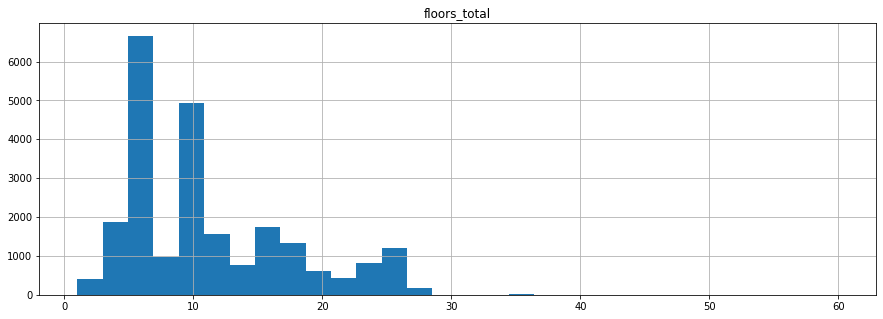

In [ ]:
data.hist('floors_total', bins=30, figsize=(15,5))

Построим гистрограмму размаха

<AxesSubplot:>

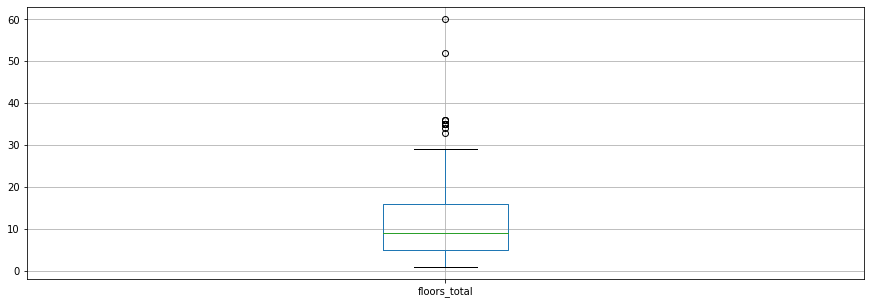

In [ ]:
data.boxplot(column=['floors_total'], figsize=(15,5))

Есть дома с 1 этажом, выбиваются значения свыше 30 этжей.
Незаполненными осталось 86 ячеек, поскольку они не влияют на ход исследования и их доля мала, удалим строки с нулевыми значениями в данном столце.
Также изменим тип данных с float на int, поскольку количество этажей это целое число.

In [ ]:
# удалим пустые значения
data = data.dropna(subset=['floors_total'])
# изменим тип данных
data['floors_total'] =  data['floors_total'].astype('int')
# и посмотрим на результат
data['floors_total'].describe()

count    23522.000000
mean        10.684211
std          6.599264
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64



Посмотрим на значения стобца `living_area` при помощи гистограммы

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

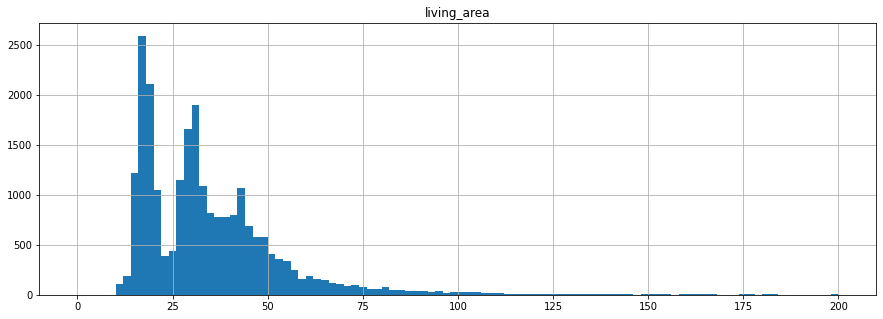

In [ ]:
data.hist('living_area', bins=100, range=(0,200), figsize=(15,5))

Есть квартиры меньше 10 кв.м.,это точно аномалия; максимальная площадь 409 кв.м., по данным поисковой системы такое возможно. Квартиры площадью менее 10 кв.м удалим, поскольку данная информация исказит данные. Также посмотрим, нет ли квартир с жилой площадью и кухней превышающей общую площадь.  
Проверим, возможно незаполенные ячейки возникли потому, что данная квартира, является студией или у квартиры свободная планировка.


In [ ]:
print(f'Квартиры, с нулевой площадью не являются студиями: {len(data[(data["living_area"].isna()) & (data["studio"] == False) & (data["open_plan"] == False)])}')
print(f'Квартиры, где жилая площадь меньше 10 кв.м: {data.query("living_area < 10")["living_area"].count()}')
print(f'Квартиры, где жилая площадь с кухней больше общей площиди: {data.query("(living_area + kitchen_area) > total_area")["living_area"].count()}')
# удалим квартиры с площадью менее 10 кв.м
data.drop(index=data.query('living_area < 10').index,inplace=True)


Квартиры, с нулевой площадью не являются студиями: 1850
Квартиры, где жилая площадь меньше 10 кв.м: 25
Квартиры, где жилая площадь с кухней больше общей площиди: 64


Удалили квартиры, с жилой площадью меньше 10 кв. м.
Выявили квартиру где жилая площадь с кухней больше общей площиди, но такая квартира одна, поэтому делать с ней ничего не будем.
Заменим медианным значением в зависимости от количества комнат жилую площадь.

In [ ]:
for i in range(0, data['rooms'].max()):
    ratio = (data[data['rooms'] == i]['living_area'] / data[data['rooms'] == i]['total_area']).median()
    data['living_area'] = data['living_area'].fillna(value = data['total_area'] * ratio)

В столбце `floor`нет нулевых значений. Минимаьльный этаж - 1, максимальный - 33, аномальных значений нет


array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

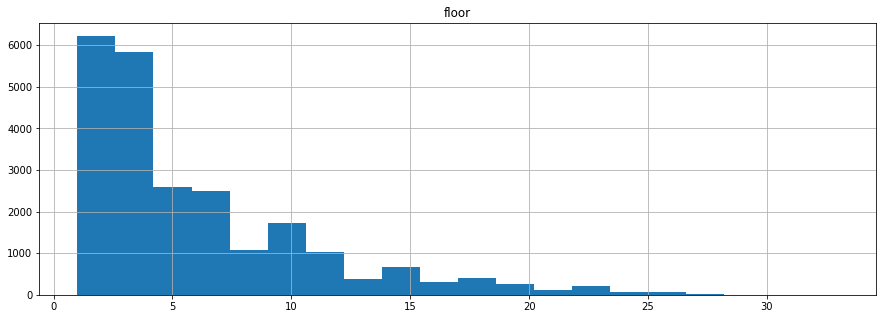

In [ ]:
data.hist('floor',bins=20, figsize=(15,5))

В столбцах `is_apartament` заменим все значения на False, `balcony` на 0, раз данные не заполнены, предполагаем, что балконов нет, и рядом нет аэропортов, парков и прудов.

Незаполенные ячейки в стобцах `parks_around3000` и `ponds_around3000` оставим как есть, посколько данных могли не подтянуться  из геолокации.

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['balcony'] = data['balcony'].fillna(value=0)

`kitchen_area` - площадь кухни. Здесь есть одна квартира с площадью кухни меньше 1 кв. метра. Явно аномалия.
 Кухонь с площадью более 30 кв.м. довольно мало. В квартирах студиях и квартирах со свободной планировкой кухонь нет, поэтому данный признак не может быть заполнен. заменим медианным значением

In [ ]:
print(f'Площадь кухни меньше 2 кв.м.: {data.query("kitchen_area < 2")["living_area"].count()}')
print(f'Площадь кухни больше 50 кв.м.: {data.query("kitchen_area > 50")["living_area"].count()}')
print(f'Площадь кухни больше общей площади: {data.query("kitchen_area > total_area")["living_area"].count()}')
print('Квартиры-студии с неуказанной площадью кухни:', len(data[(data['kitchen_area'].isna()) & (data['studio'] == True)]))
print('Квартиры свободной планировки с неуказанной площадью кухни:', len(data[(data['kitchen_area'].isna()) & (data['open_plan'] == True)]))

Площадь кухни меньше 2 кв.м.: 1
Площадь кухни больше 50 кв.м.: 45
Площадь кухни больше общей площади: 0
Квартиры-студии с неуказанной площадью кухни: 143
Квартиры свободной планировки с неуказанной площадью кухни: 67


In [ ]:
 # для каждого количества комнат считаем, какая медианная доля общей площади - кухня, и назначаем для пропусков такое значение
for i in range(1, data['rooms'].max()):
    ratio = (data[data['rooms'] == i]['kitchen_area'] / data[data['rooms'] == i]['total_area']).median()
    data['kitchen_area'] = data['kitchen_area'].fillna(value = data['total_area'] * ratio)

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

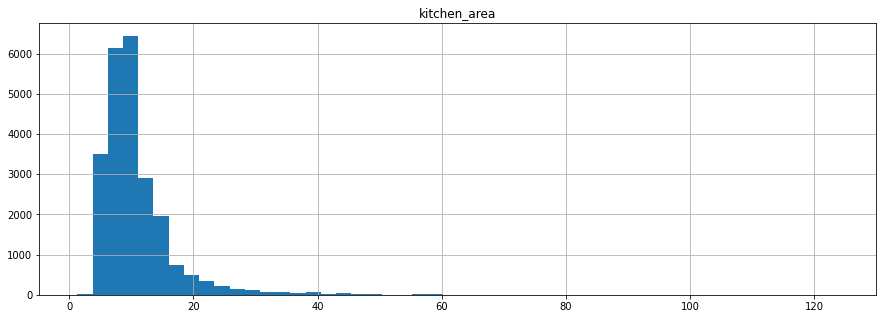

In [ ]:
data.hist('kitchen_area', bins=50, figsize=(15,5)) # взглянем на гистрамму

### Уникальные значения в столбце locality_name

удалим все столбцы, в которых не указан населенный пункт и посмотрим, сколько у нас уникальных значений

In [ ]:
data.dropna(subset=['locality_name'], inplace=True)

In [ ]:
def loc_length():
    return print('Количество уникальных занчений locality_name:', data['locality_name'].unique().shape[0])
loc_length()

Количество уникальных занчений locality_name: 363


In [ ]:
data['locality_name'].sort_values().unique() # посмотрим на все названия населенных пунктов

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Советский', 'городской посёлок Фёдоро

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')


Поскольку названия населенных пунктов внесены по разному, где то Мурино, а где то поселок городского типа Мурино, деревня Кудрово - Кудрово, то мы вообще уберем обозначения населенныз пунктов, чтобы не путаться в дальнейшем

In [ ]:
# напишем функцию для преобразования строк
def place_short(text):
    dict =['деревня ',
           'коттеджный поселок ', 'садовое товарищество ',
           'поселок городского типа ', 'поселок при железнодорожной станции ', 'поселок станции ',
           'городской поселок ', 'садоводческое некоммерческое товарищество ',
           'поселок имени', 'поселок ', 'село ']
    for i in dict:
        text = text.replace(i, '')
    return text
# создадим столбец с новыми названиями
data['locality_name_new'] = data['locality_name'].apply(place_short)
# посмотрим, что получилось
data['locality_name_new'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

In [ ]:
data.info() # что в итоге

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23449 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23449 non-null  int64         
 1   last_price            23449 non-null  float64       
 2   total_area            23449 non-null  float64       
 3   first_day_exposition  23449 non-null  datetime64[ns]
 4   rooms                 23449 non-null  int64         
 5   ceiling_height        23449 non-null  float64       
 6   floors_total          23449 non-null  int64         
 7   living_area           23449 non-null  float64       
 8   floor                 23449 non-null  int64         
 9   is_apartment          23449 non-null  bool          
 10  studio                23449 non-null  bool          
 11  open_plan             23449 non-null  bool          
 12  kitchen_area          23449 non-null  float64       
 13  balcony         

**Выводы:**
Мы проанализировали в первом приближении все пропущенные или очевидно некорректные значения
- оценили имеющиеся данные
- удалили явно выбивающуюся цену квартиры в столбце `last_price`
- заменили в столбце `first_day_exposition` тип данных на datatime и отбросили время публикации объявлений
- заменили тип данных в `is_apartment` на буевое значение False для экономии памяти
- привели в соответствие данные в столбце `ceiling_height`, разделив значения свыше 25 м на 10, а также удалив значения менее 2.5 и свыше 5
- удалили пустые значения в столбце `floors_total` , заменили тип данных на целочисленный
- в столбце `living_area` удалили значения менее 10 кв.м, заполнили отсутствующие значения медианными в зависимости от количества комнат
- в столбцах balcony, parks_around3000, ponds_around3000 на 0
В таблице есть пропуски в автоматически полученных данных - о расположении объекта относительно парков и водоемов, возможно, из-за некорректно заполненного адреса. В будущем следует требовательнне относиться к заполнению пользователем точного адреса объекта - он позволяет выяснить много важной информации о квартире.

## Добавление  в таблицу новых столбцов

Посчитаем и добавим в таблицу новые столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23449 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23449 non-null  int64         
 1   last_price            23449 non-null  float64       
 2   total_area            23449 non-null  float64       
 3   first_day_exposition  23449 non-null  datetime64[ns]
 4   rooms                 23449 non-null  int64         
 5   ceiling_height        23449 non-null  float64       
 6   floors_total          23449 non-null  int64         
 7   living_area           23449 non-null  float64       
 8   floor                 23449 non-null  int64         
 9   is_apartment          23449 non-null  bool          
 10  studio                23449 non-null  bool          
 11  open_plan             23449 non-null  bool          
 12  kitchen_area          23449 non-null  float64       
 13  balcony         

In [ ]:
data['price_sq_m'] = data['last_price'] / data['total_area'] # найдем цену одного квадратного метра и поместим результаты в новый столбец

In [ ]:
# найдем день, месяц и год публикации объявления, поместим их в новые столбцы
data['day_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [ ]:
# создадим функцию, которая выводит тип этажа

def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

#  и добавим эти данные в новый столбец
data['floor_category'] = data.apply(categorize_floor, axis = 1)

In [ ]:
data['floor_category'].value_counts() #посмотрим на результат

другой       17254
последний     3304
первый        2891
Name: floor_category, dtype: int64

In [ ]:
#найдем расстояние до центра города в километрах
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
data['city_centers_nearest_km'] =  data['city_centers_nearest_km'].astype('Int32')

In [ ]:
data.reset_index(drop= True , inplace= True ) # сбросим идексы

**Выводы**

Добавили в таблицу новые столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

## Исследовательский анализ данных

### Изучение параметров

Изучим следующие параметры:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

In [ ]:
data.describe() #вновь посмотрим на наши парамерты

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,day_exposition,month_exposition,year_exposition,city_centers_nearest_km
count,23449.000000,2.344900e+04,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,...,17982.000000,7979.000000,17982.000000,8992.000000,20294.000000,2.344900e+04,23449.000000,23449.000000,23449.000000,17981.000000
mean,9.881615,6.531432e+06,60.337892,2.071304,2.697121,10.683227,35.204989,5.879440,10.881959,0.592733,...,0.610166,490.482266,0.769492,518.269684,180.846851,9.936049e+04,2.567785,6.402235,2017.370762,14.189700
std,5.678959,1.084642e+07,35.563867,1.078717,0.215265,6.595004,22.960850,4.872138,6.470855,0.959710,...,0.801369,341.857194,0.938802,277.811641,219.981686,5.006954e+04,1.787768,3.492584,1.037726,8.623667
min,0.000000,4.300000e+05,12.000000,0.000000,2.500000,1.000000,8.965517,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,7.962963e+03,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.420000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.100000,0.000000,...,0.000000,287.000000,0.000000,293.000000,45.000000,7.664884e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.400000,4.000000,9.430000,0.000000,...,0.000000,454.000000,1.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.900000,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,730.000000,231.000000,1.141805e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,5.000000,60.000000,435.172414,33.000000,123.900255,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


общая площадь квартир

Text(0.5, 1.0, 'Распределение ликвидных площадей квартир')

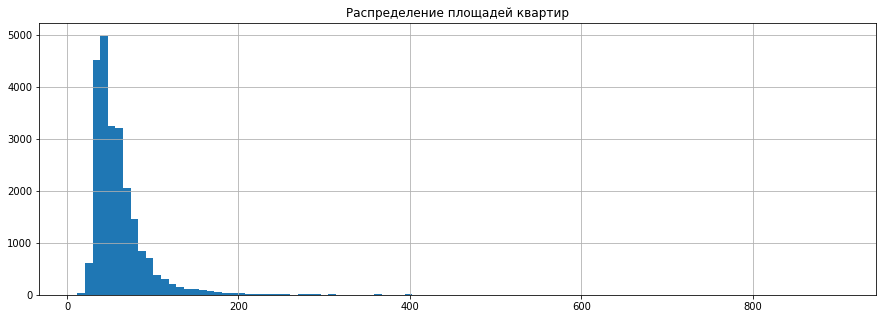

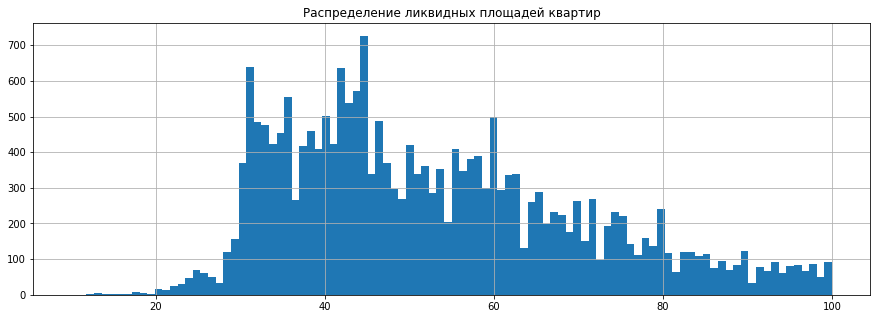

In [ ]:
data.hist('total_area', bins=100, figsize=(15,5))
plt.title('Распределение площадей квартир')

data.hist('total_area', bins=100, range =(10, 100), figsize=(15,5))
plt.title('Распределение ликвидных площадей квартир')

<AxesSubplot:>

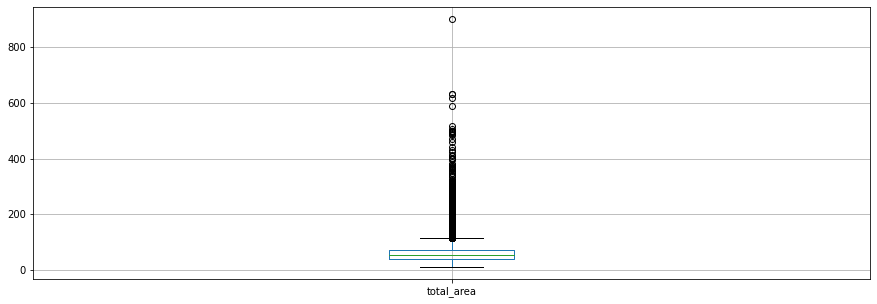

In [ ]:
data.boxplot(column=['total_area'], figsize=(15,5))

Средняя площадь квартир 52 кв.м, медиана - 60 кв.м, минимальная площадь 12 кв.м., максимальная - 900 кв.м., но в Санкт-Петербурге такое возможно за счет объединения бывших коммунальных квартир. Большинство кваритр от 30 до 100 кв.

жилая площадь;

Text(0.5, 1.0, 'Распределение жилых площадей')

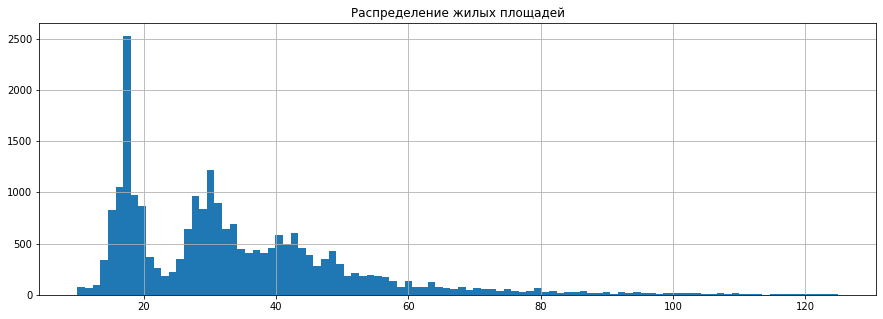

In [ ]:
data.hist('living_area', bins=100, range =(10, 125), figsize=(15,5))
plt.title('Распределение жилых площадей')

Средняя жилая площадь квартир 30.4 кв.м., медиана 35.2. Минимальная площадь 9 кв.м. , а обладателям максимальной площадь 435 кв.м. остается только позавидовать. Наблюдаем два пика - на 18 кв.м. и на 30 кв.м.

площадь кухни

Text(0.5, 1.0, 'Площадь кухни от 4 до 20 кв.м')

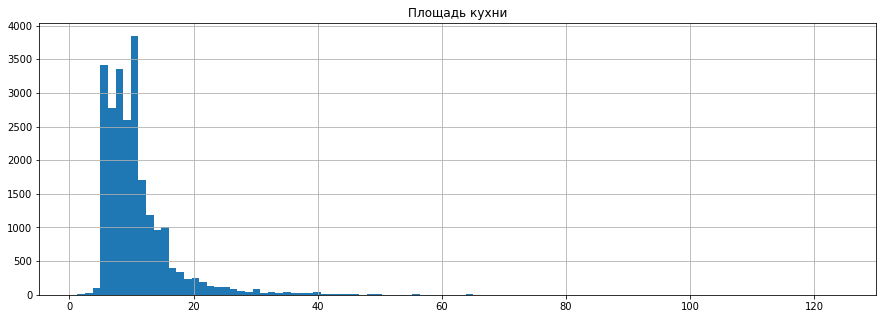

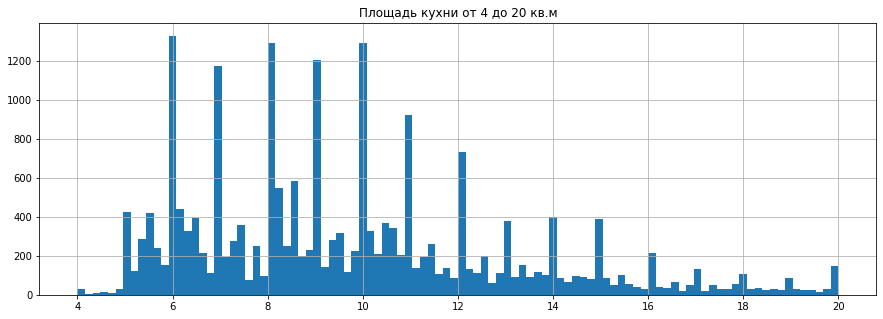

In [ ]:
data.hist('kitchen_area', bins=100, figsize=(15,5))
plt.title('Площадь кухни')
data.hist('kitchen_area', bins=100, range =(4, 20), figsize=(15,5))
plt.title('Площадь кухни от 4 до 20 кв.м')

Средняя площадь кухонь 9.1 кв.м., медиана 10.5, то есть вбросы почти не критичны. Минимальная площадь 1.3 кв.м. (видимо в квартирах 9 кв.м.), максимальная 112 кв.м., скорее всего это элитное жилье. В основном кухни имеют площадь от 5 до 20 кв.м.

цена объекта

count    2.344900e+04
mean     6.531432e+06
std      1.084642e+07
min      4.300000e+05
25%      3.420000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

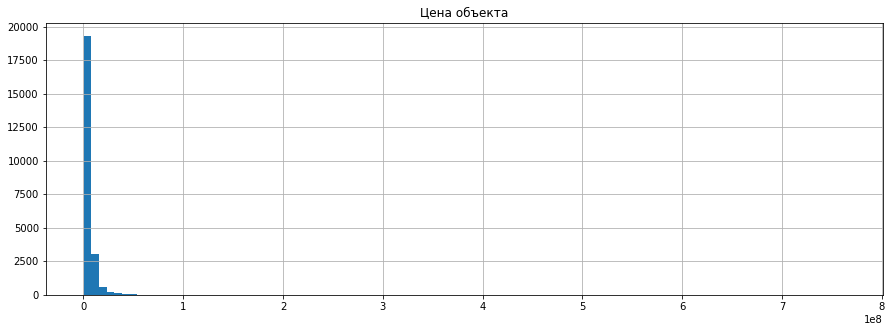

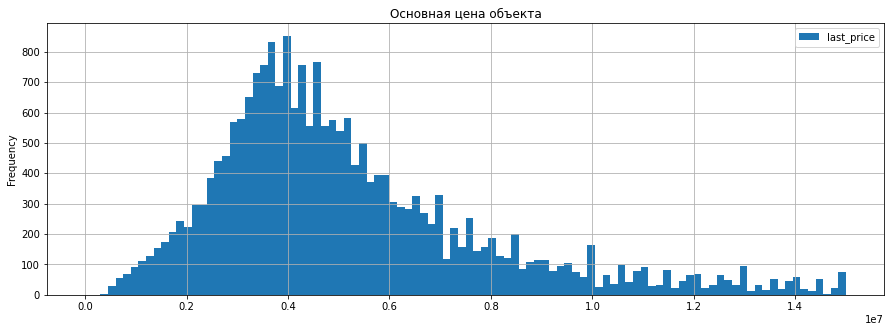

In [ ]:
data.hist('last_price', bins=100, figsize=(15,5))
plt.title('Цена объекта')
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (15,5))
plt.title('Основная цена объекта')
data['last_price'].describe()


значения выводятся в экспоненциальной записи чисел. Цена объекта выглядит нормально, минимальная цена 430000 р., максимальная - 763000000. медиана 6531432, среднее - 4650000 р.   Очень длинный "хвост" вправо - видимо это элитная недвижимость. \

количество комнат

Text(0.5, 1.0, 'Количество комнат')

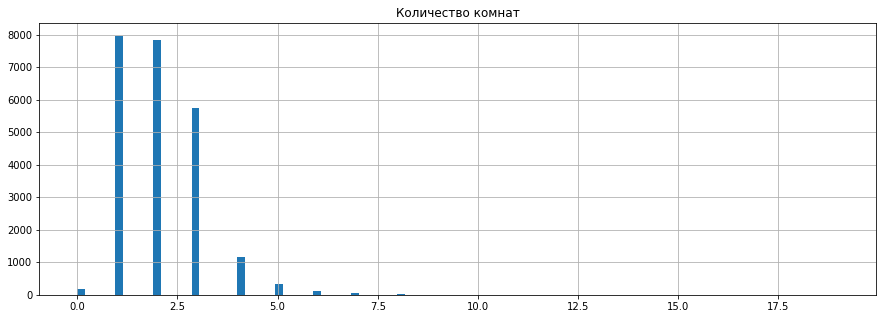

In [ ]:
data.hist('rooms', bins=100,  figsize=(15,5))
plt.title('Количество комнат')


Количество комнат колеблется от 0 до 19 штук, средняя величина - 2, медиана - 2.07, все хорошо. В основном продаются одно- и двух-комнатные квартиры, трехкомнатных немного меньше.

высота потолков

Text(0.5, 1.0, 'Высота потолков')

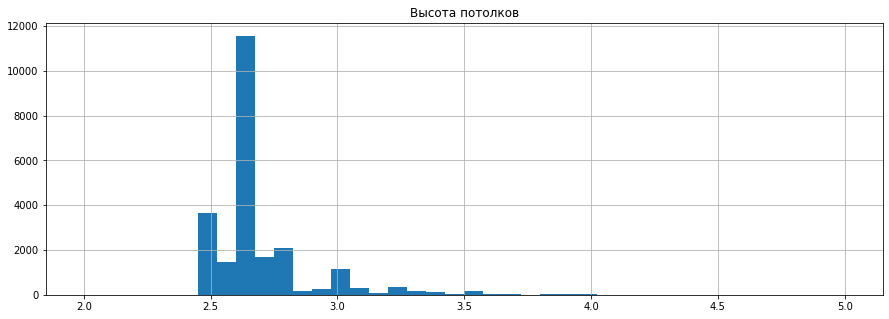

In [ ]:
data.hist('ceiling_height', bins=40, range = (2,5), figsize=(15,5))
plt.title('Высота потолков')

Ранее мы ограничили высоту потолков от 2.5 до 5 м, с данными на графике все в порядке, в основном высота потолка составляет 2.6 м.

Text(0.5, 1.0, 'Этаж')

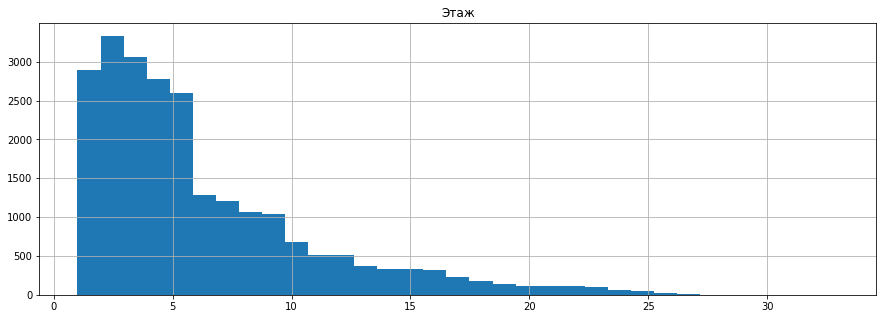

In [ ]:
data.hist('floor', bins=data['floor'].max(),  figsize=(15,5))
plt.title('Этаж')

В оснвном этажи с первого по пятый, из чего можно сделать вывод, что скорее всего основная часть домов - это панельные или кирпичные пятиэтажки, с 6 этажа виден резки спад, самый высокий этаж - 33.

Text(0.5, 1.0, 'Категория этажа')

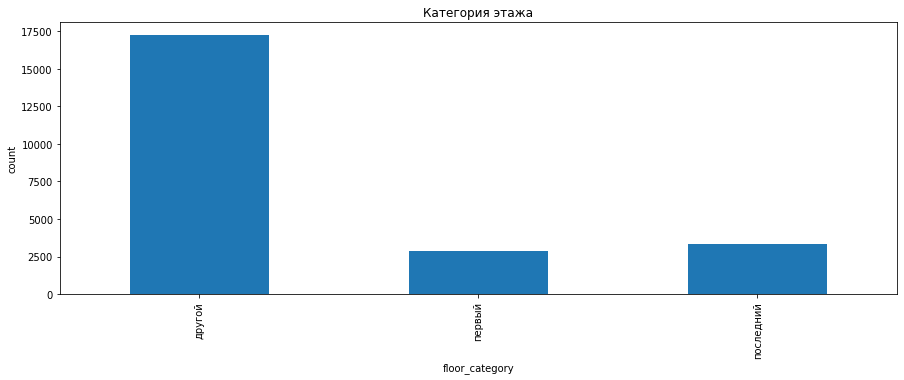

In [ ]:
data.groupby(by='floor_category')['floor_category'].count().plot(kind='bar', ylabel = 'count', figsize=(15,5))
plt.title('Категория этажа')

В основном на продажу выставлены квартиры не на первом и не на последем этаже, что закономерно, так как таких квартир больше

Text(0.5, 1.0, 'Всего этаже в доме')

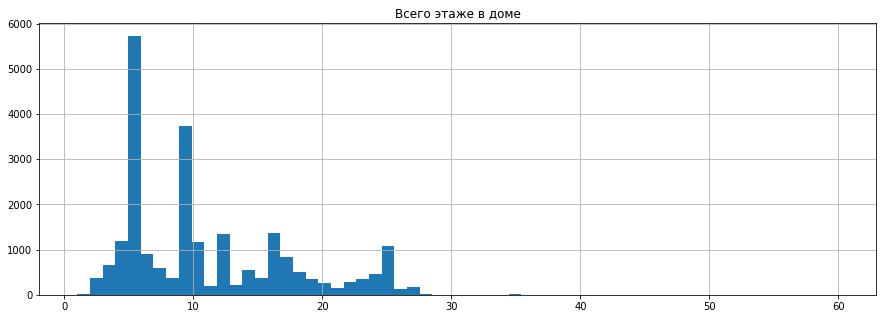

In [ ]:
data.hist('floors_total', bins=60,  figsize=(15,5))
plt.title('Всего этаже в доме')

<AxesSubplot:>

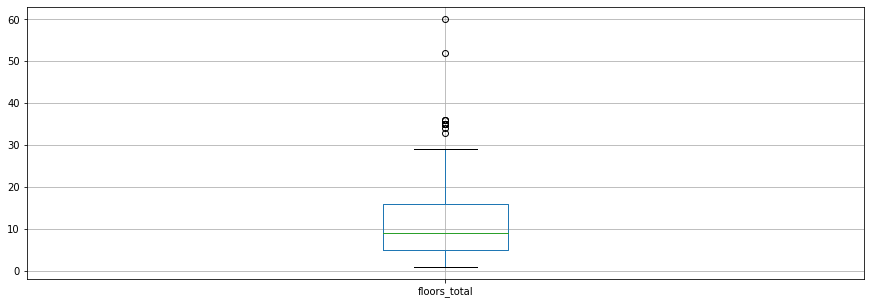

In [ ]:
data.boxplot(column=['floors_total'], figsize=(15,5)) # посмотрим на диаграмму размаха

Как и предполагалось ранее, в основном продаются квартиры в пятиэтажных домах, но также виден пик в девятиэтажках. Есть квартиры расположенные на первом и на 60 этажах.

расстояние до центра города в метрах

Text(0.5, 1.0, 'Расстояние до центра города, м')

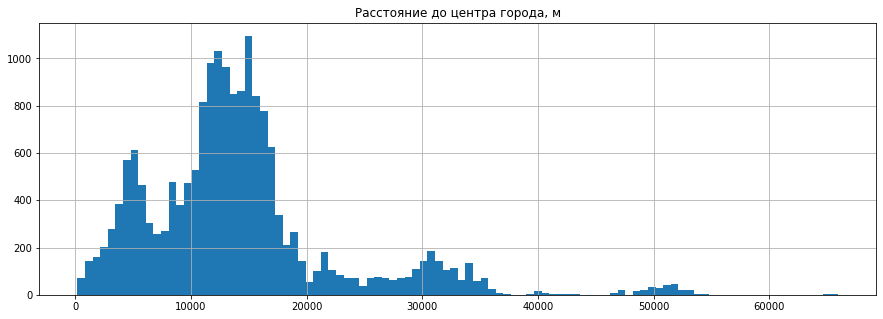

In [ ]:
data.hist('city_centers_nearest', bins=100, figsize=(15,5))
plt.title('Расстояние до центра города, м')

Здесь наблюдаем два пика, один маленький, 5км и другой побльшой от 10 км. до 15 км. Так же есть совсем небольшие всплески на 30 км. и 50 км.

Text(0.5, 1.0, 'Расстояние до ближайшего аэропорта, м')

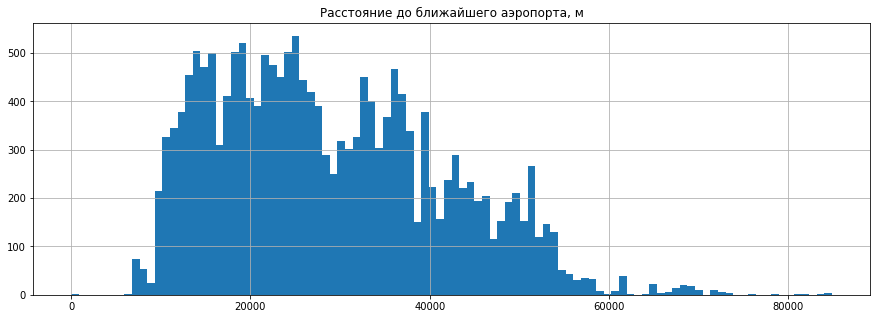

In [ ]:
data.hist('airports_nearest', bins=100, figsize=(15,5))
plt.title('Расстояние до ближайшего аэропорта, м')

Здесь видим довольно "шумный" график. Но это вполне нормально.

Text(0.5, 1.0, 'Расстояние до ближайшего парка, м')

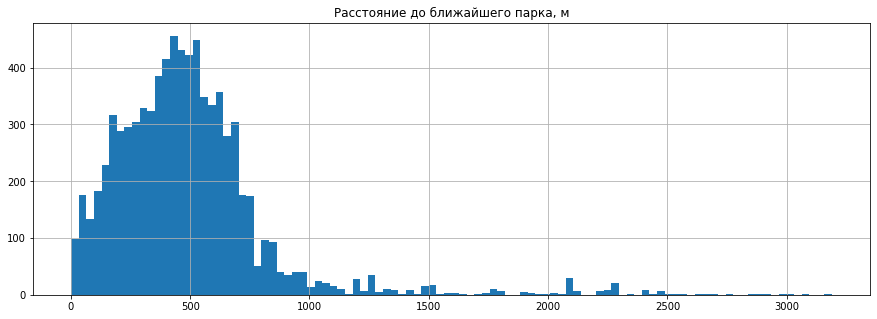

In [ ]:
data.hist('parks_nearest', bins=100, figsize=(15,5))
plt.title('Расстояние до ближайшего парка, м')

В основном продаваемые квартиры находятся на расстоянии 200-750 метров до ближайшего парка.

День и месяц продажи квартиры

Text(0.5, 1.0, 'Месяц публикации объявления')

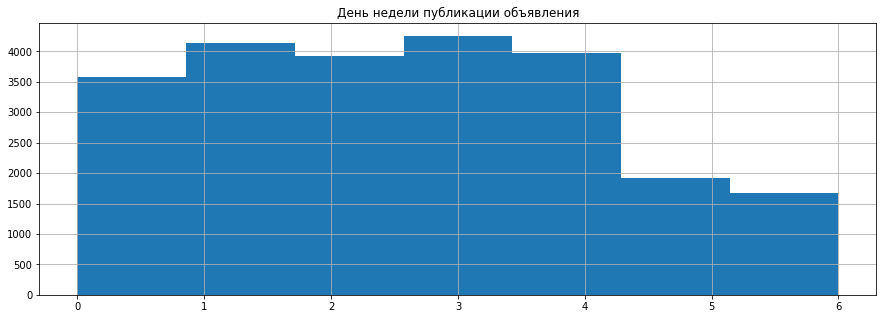

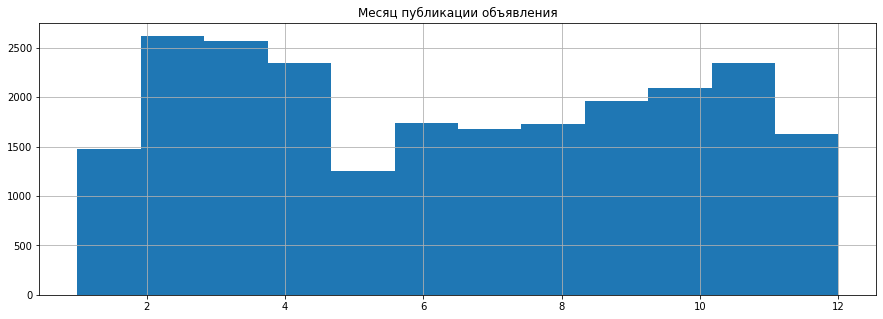

In [ ]:
data.hist('day_exposition', bins=7, figsize=(15,5))
plt.title('День недели публикации объявления')
data.hist('month_exposition', bins=12, figsize=(15,5))
plt.title('Месяц публикации объявления')


В будние дни в основном ровное распределение подачи объявлений, заметен существенный спад в субботу и воскресенье.
Больше всего объявлений размещено в феврале марте, ноябре. Очевидный провал в январе, мае, возможно это связано с праздниками.

**Вывод**

Большинство квартир имеют общую площадь от 30 до 100 кв.м. Средняя жилая площадь 30 кв.м., площадь кухонь в большинстве от 5 до 20 кв.м. Больше всего выставлено на продажу одно- и двухкомнатные квартиры. Средняя цена квартиры 4650000, медиана 6531432 руб. Выосота потолков в среднем 2.6 метра. Квартиры в основном продаются до 5 этажа; квартир, расположенных на первом и последнем жтажах меньше, чем на других. Квартиры расположены на расстоянии до 20 км от центра, 200-700 метров до парка и до 4 км от аэропорта.

Чаще публикуются объявления в будние дни, всплеск на рынке недвижимости заметен с февраля по апрель и с октября по ноябрь. Скорее всего это свзяно с отсутствием в эти дни праздников и отпусков.

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Гистограммы построены и прокомментированы правильно.</div>

### Скорость продажи квартир

count    20294.000000
mean       180.846851
std        219.981686
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Количество пропусков days_exposition: 3155
Среднее время продажи квартиры в днях: 180
Медианное время продажи квартиры в днях: 95


Text(0.5, 1.0, 'Распределение времени продажи квартир до 180 дней')

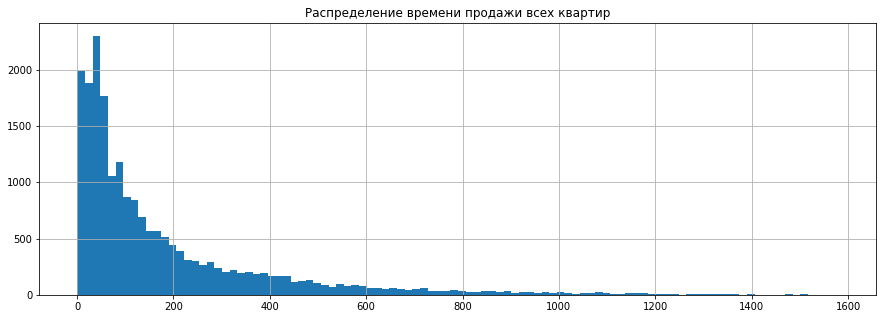

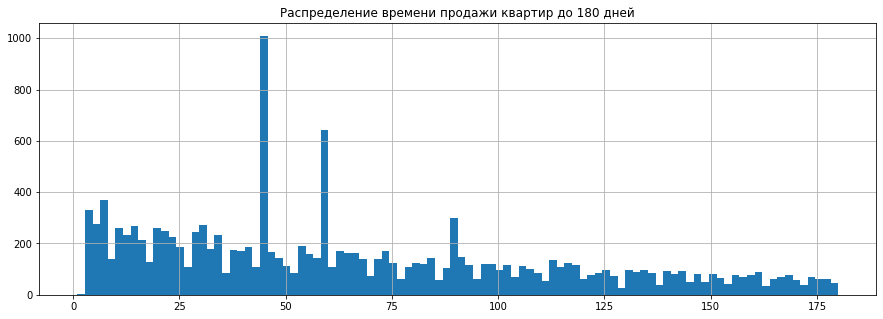

In [ ]:
print(data['days_exposition'].describe())
print()
print('Количество пропусков days_exposition:', data['days_exposition'].isna().sum())
print('Среднее время продажи квартиры в днях:',int(data['days_exposition'].mean()))
print('Медианное время продажи квартиры в днях:',int(data['days_exposition'].median()))
data.hist('days_exposition', bins=100, figsize=(15, 5))
plt.title('Распределение времени продажи всех квартир')
data.hist('days_exposition', bins=100, range = (1,180), figsize=(15, 5))
plt.title('Распределение времени продажи квартир до 180 дней')


Тут мы видим распределение Пуассона, график смещен влево при быстрых продажах, а с увеличением числа событий становится симметричным и уходит вправо длинным хвостом.
Среднее время продажи квартиры составляет 181 день, медианное время продажи квартиры - 95 дня, такая разница связана с тем, что некоторые квартиры продавались очень долго.
Посмотрев на гисторгамму продажи квартир до 200 дней, видим всплески на 45, 60 и 90 дней, скорее всего это связано с правилами платформы для размещения объявлений.
Предположим, что быстрыми можно считать продажи до 95 дней, а долгими - свыше 181.

### Факторы, влияющие на общую (полную) стоимость объекта

Посмотрим на матрицу корреляции между следующими параметрами:
- цена на момент снятия объявления;
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- этаж, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

In [ ]:
# Создадим список с параметрами для проверки
corr_param = [
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms',
    'floor_category',
    'day_exposition',
    'month_exposition',
    'year_exposition']

In [ ]:
# и список с названиями параметров
corr_names = [
    'стоимость квартиры',
    'общая площадь квартиры',
    'жилая площадь',
    'площадь кухни',
    'количество комнат',
    'день размещения объявления\nдень',
    'месяц публикации объявления\nмесяц',
    'году публикации объявления\nгод']

In [ ]:
#выведем на экран матрицу корреляции
corr_matrix = data[corr_param].corr()
display(corr_matrix)

,last_price,total_area,living_area,kitchen_area,rooms,day_exposition,month_exposition,year_exposition
last_price,1.000000,0.652038,0.582879,0.516771,0.362603,0.001772,0.001990,-0.041815
total_area,0.652038,1.000000,0.944640,0.655417,0.759399,-0.005632,0.005254,-0.077840
living_area,0.582879,0.944640,1.000000,0.531700,0.816651,-0.001735,-0.001190,-0.064134
kitchen_area,0.516771,0.655417,0.531700,1.000000,0.323540,0.002195,0.001896,-0.054240
rooms,0.362603,0.759399,0.816651,0.323540,1.000000,-0.005226,-0.003515,-0.053944
day_exposition,0.001772,-0.005632,-0.001735,0.002195,-0.005226,1.000000,0.013276,-0.002950
month_exposition,0.001990,0.005254,-0.001190,0.001896,-0.003515,0.013276,1.000000,-0.271570
year_exposition,-0.041815,-0.077840,-0.064134,-0.054240,-0.053944,-0.002950,-0.271570,1.000000


Заметна наибольшая линейная связь между общей площадью, жилой площадью, площадью кухни и ценой, связь между комнатами и ценой меньше, то есть чем больше площади, тем выше цена.  Линейная связ между  стоимостью квартиры и днем недели, месяцем или годом размещения объявления отсутствует.

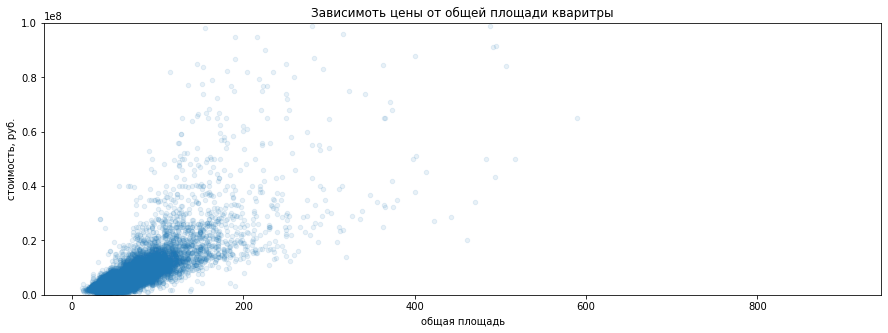

In [ ]:
# используем тип графика scatter
data.plot(x = 'total_area', y = 'last_price',  kind ='scatter', legend=True, figsize=(15, 5), alpha = 0.1)
plt.title('Зависимоть цены от общей площади кваритры')
plt.xlabel('общая площадь')
plt.ylabel('стоимость, руб.')
plt.ylim(0, 100000000)
plt.show()


Как видно из графика, больше всего квартир стоимостью до 20 млн. руб. и площадью до 150 кв.м. Наблюдаем прямопропорциональную зависимость - чем площадь больше, тем выше стоимость квартир

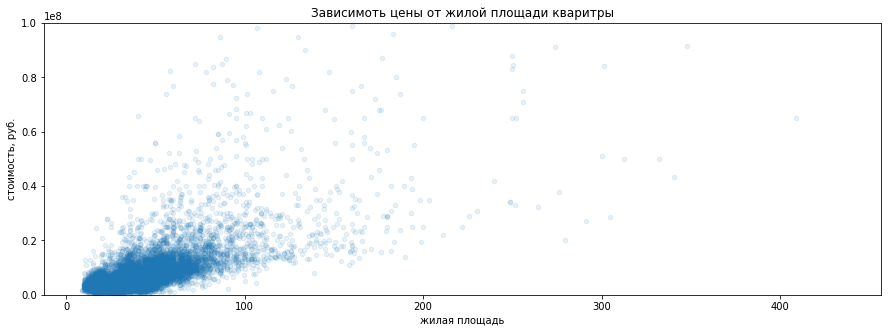

In [ ]:
data.plot(x = 'living_area', y = 'last_price',  kind ='scatter', legend=True, figsize=(15, 5), alpha = 0.1)
plt.title('Зависимоть цены от жилой площади кваритры')
plt.xlabel('жилая площадь')
plt.ylabel('стоимость, руб.')
plt.ylim(0, 100000000)
plt.show()


Из графика видм, что больше всего квартир стоимостью до 20 млн. руб. и жилой площадью до 80 кв.м. Наблюдаем прямопропорциональную зависимость - чем жилая площадь больше, тем выше стоимость квартир

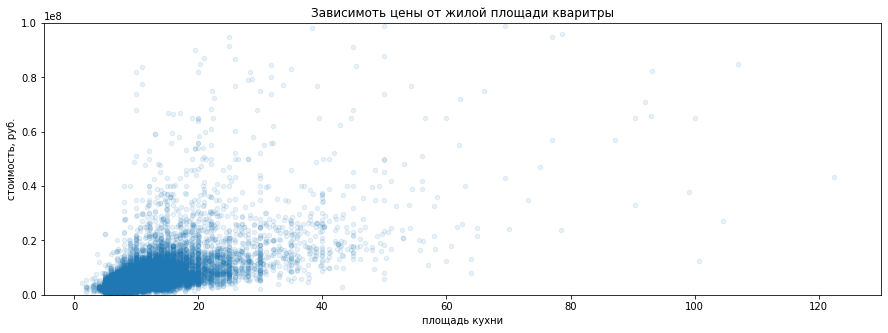

In [ ]:
data.plot(x = 'kitchen_area', y = 'last_price',  kind ='scatter', legend=True, figsize=(15, 5), alpha = 0.1)
plt.title('Зависимоть цены от жилой площади кваритры')
plt.xlabel('площадь кухни')
plt.ylabel('стоимость, руб.')
plt.ylim(0, 100000000)
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью кухни до 18 м². Зависимость прямопропорциональная - чем больше площадь кухни, тем выше ее стоимость

Text(0, 0.5, 'руб.')

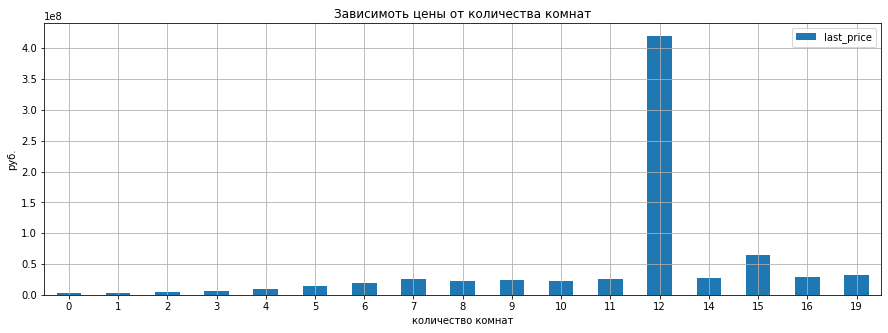

In [ ]:
(
    data.groupby('rooms').agg({'last_price':'median'})
    .plot(kind='bar', grid=True, figsize=(15, 5), alpha=1, rot=0)
)
plt.title('Зависимоть цены от количества комнат')
plt.xlabel("количество комнат")
plt.ylabel("руб.")

прямая зависимость до 7 комнат, чем больше комнат, тем выше цена. дальше данные независимы. выбивается квартира в 12 комнат. посмотрим на нее

In [ ]:
data[data['rooms'] == 12]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,price_sq_m,day_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
19347,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,...,2.0,318.0,106.0,Санкт-Петербург,466666.666667,2,12,2017,последний,8


площадь соответствует комнатности, последний этаж, возможно это двухуровневая квартира. продавец вправе ставить любую цену. оставим ее

Text(0.5, 1.0, 'Зависимоть цены от категории этажа')

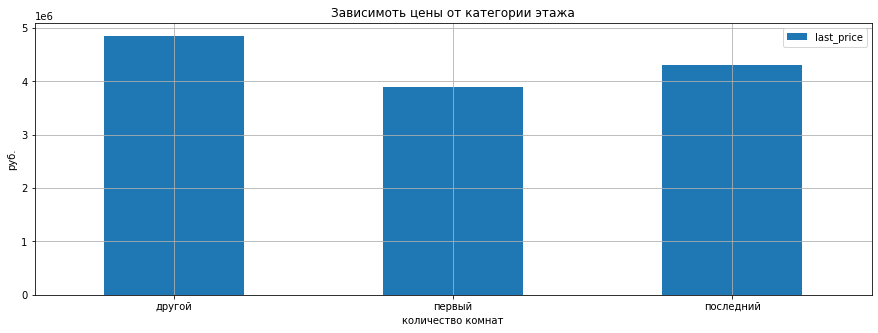

In [ ]:
(
    data.groupby('floor_category').agg({'last_price':'median'})
    .plot(kind='bar', grid=True, figsize=(15, 5), alpha=1, rot=0)
)
plt.title('Зависимоть цены от категории этажа')
plt.xlabel("количество комнат")
plt.ylabel("руб.")
plt.title('Зависимоть цены от категории этажа')

Заметно, что первый этаж стоит дешевле последнего и других этажей, но так было всегда, закономерность логичная.

Text(0.5, 1.0, 'Зависимоть цены от года размещения объявления')

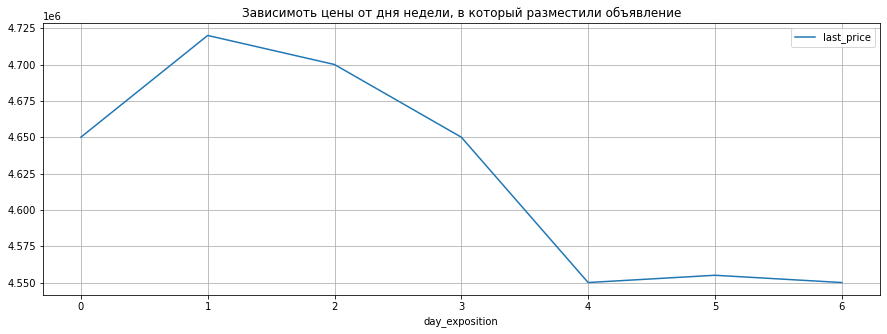

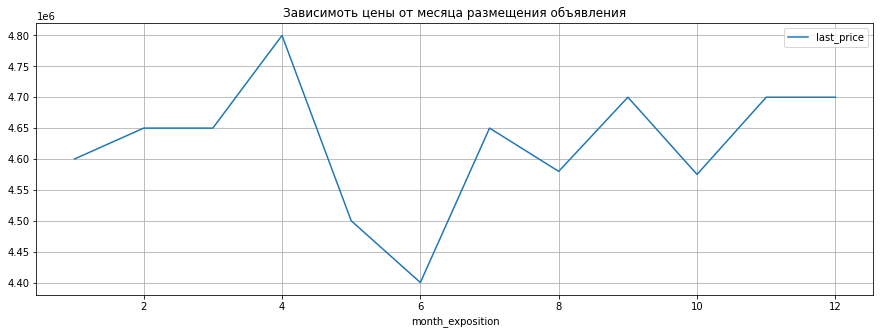

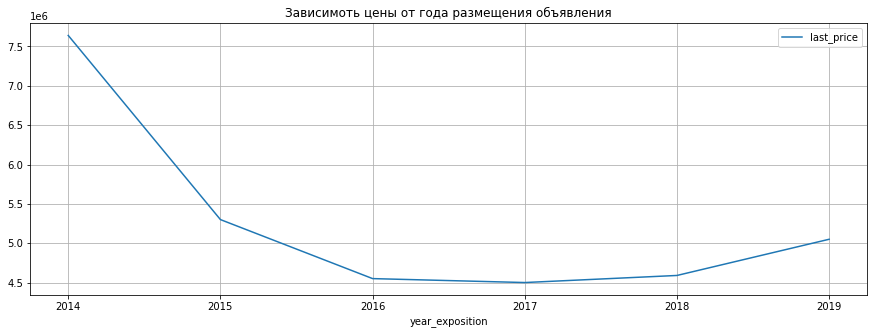

In [ ]:
(
    data.groupby('day_exposition').agg({'last_price':'median'})
    .plot(kind='line', grid=True, figsize=(15, 5), alpha=1)
)
plt.title('Зависимоть цены от дня недели, в который разместили объявление')

(
    data.groupby('month_exposition').agg({'last_price':'median'})
    .plot(kind='line', grid=True, figsize=(15, 5), alpha=1)
)
plt.title('Зависимоть цены от месяца размещения объявления')

(
    data.groupby('year_exposition').agg({'last_price':'median'})
    .plot(kind='line', grid=True, figsize=(15, 5), alpha=1)
)
plt.title('Зависимоть цены от года размещения объявления')

День недели особо не влияет на цену объявления.
К апрелю видим самые высокие цены на объявления, скорее всего связано с тем, что в январе были праздники, скорее всего, а к весне  рынок активизируется, повышается спрос, в этой связи растут цены на предложения. К маю цены падают, связано с праздниками, летние месцы - период отпусков. После отпусков снова заметен рост цены, так как люди готовы покупать недвижимость.
По годам, заметен спад стоимости квартир от 2014 до 2018 года.

**Выводы по всем параметрам**

Зависимость цены от общей площади, жилой площади, площади кухни имеется - чем больше площади, тем дороже квартира.
По количеству комнат заметно, что от 1 до 7 комнат цена возрастает, после 7 комнат цена можнет быть любой.
В целом квартиры на первом этаже дешевле, чем на последнем.
Объявления поданные во вторник имеют самую высокую цену, объявления, размещенные в выходныхе - самую низкую, скорее всего это связно с меньшим количеством объявлений, размещаемых в выходыне дни.
Апрель - самый дорогой месяц для покупки недвижимости, самый дешевый - июнь. как сказано ранее, связано скорее всего с отпусками.
По годам, заметен спад стоимости квартир от 2014 до 2018 года.

### Самые дорогие и дешевые квартиры

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [ ]:
#создадим сводную таблицу с количеством объявлений и средним значением за квадратный метр в каждом населенном пункте
locality_name_count = data.pivot_table(index='locality_name', values='price_sq_m' ,aggfunc=['mean','count'])
locality_name_count.columns = ['mean','count']

#создадим список из 10 популярных значений и посмотрим на них
popular_10 =locality_name_count.sort_values(by ='count', ascending=False).head(10)
popular_10

,mean,count
locality_name,,
Санкт-Петербург,114756.114078,15580
поселок Мурино,85601.120803,551
поселок Шушары,78577.014984,438
Всеволожск,68719.320400,397
Пушкин,103147.825496,366
Колпино,75443.972838,337
поселок Парголово,90205.423758,326
Гатчина,68746.146763,307
деревня Кудрово,92473.547576,299


In [ ]:
popular_10[popular_10['mean']==popular_10['mean'].max()] #самая высокая цена за квадратный метр из списка самых популярных населенных пунктов


,mean,count
locality_name,,
Санкт-Петербург,114756.114078,15580


In [ ]:
popular_10[popular_10['mean']==popular_10['mean'].min()] #самая низкая цена за квадратный метр из списка самых популярных населенных пунктов

,mean,count
locality_name,,
Выборг,58238.143141,235


Самая дорогая недвижимость из 10 населенных пунктов с наибольшим количеством объявлений оказалась в Санкт-Петербурге - 114756.11 р. за кв.м, самая дешевая в Выборге -  58238.14 за кв.м.

### Средняя цена каждого километра до цента

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Узнаем, как стоимость объектов зависит от расстояния до центра города.

,price_km
city_centers_nearest_km,
0,245833.530289
1,177327.462388
2,157849.007329
3,121482.485192
4,133457.094124
5,140036.978205
6,149481.611222
7,156078.657745
8,124869.554376


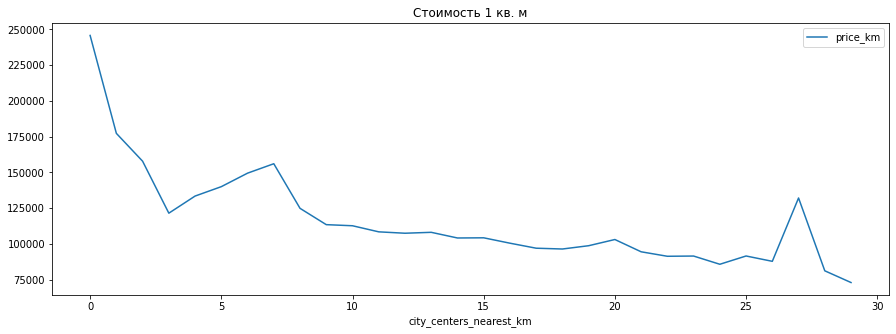

In [ ]:
#city_centers_nearest_km  расстояние до центра в километрах

data_spb=data.query('locality_name == "Санкт-Петербург"').copy()
data_spb['price_km'] = data_spb['last_price']/data_spb['total_area'] #
data_spb=data_spb.loc[:,['city_centers_nearest_km', 'price_km']].sort_values(by='city_centers_nearest_km', ascending=True)
data_spb_pivot_table = data_spb.pivot_table(index='city_centers_nearest_km', values = 'price_km', aggfunc='mean')
data_spb_pivot_table.plot(figsize=(15,5))
plt.title('Стоимость 1 кв. м')
data_spb_pivot_table

посмотрим, что за квартиры на 27 км.

In [ ]:
data_27km = data_spb[data_spb['city_centers_nearest_km'] == 27]
count_27km = data_27km['city_centers_nearest_km'].count()
print('Количество объектов на расстоянии 27 км:', count_27km)
data_27km

Количество объектов на расстоянии 27 км: 2


,city_centers_nearest_km,price_km
5895,27,70312.500000
737,27,193918.918919


Объектов, расположенных на 27 км два, картину портит  с ценой за 193919

In [ ]:
data.iloc[[737]] # посмотрим, что за объект

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,price_sq_m,day_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
737,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,0.0,NaN,128.0,Санкт-Петербург,193918.918919,1,11,2017,другой,27


Из графика видим, что чем дальше от центра, тем стоимость 1 кв. м меньше. Исходя из графика центр находится в радиусе 3 км., есть заметный скачок на графике на 27 км, это двухкомнатная квартира с общей площадью 74 м.кв., с ней явно что-то не так, цена слишком завышена.

## Общий вывод

В ходе работы мы обработали полученный датасет - удалили выбивающиеся значения, заменили тип данных, где это было необходимо, устранили пропуски заменили недостающие значения медианой.
В дальнейшем при сборе данных необходимо котролировать полученные значения - не допускать пропусков, ограничивать высоту потолков.

Для нагладности мы добавили в таблицу новые столбцы:

цена одного квадратного метра;
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры (значения — «‎первый», «последний», «другой»);
расстояние до центра города в километрах

Большинство квартир имеют общую площадь от 30 до 100 кв.м. Средняя жилая площадь 30 кв.м., площадь кухонь в большинстве от 5 до 20 кв.м. Больше всего выставлено на продажу одно- и двухкомнатные квартиры. Средняя цена квартиры 4650000, медиана 6531432 руб. Выосота потолков в среднем 2.6 метра. Квартиры в основном продаются до 5 этажа; квартир, расположенных на первом и последнем жтажах меньше, чем на других. Квартиры расположены на расстоянии до 20 км от центра, 200-700 метров до парка и до 4 км от аэропорта.

В среднем квартиры продаются до 181 дня, до 95 дней можно считать быстрыми продажами. Заметны всплески на 45, 60 и 90 дней, скорее всего это связано с правилами платформы для размещения объявлений.

В целом по Ленобласти существует однозначная зависимость между площадью квартиры и ее стоимостью, комнатностью  - чем больше площадь, и количество комнат, тем выше цена. Линейная связь между стоимостью квартиры и днем недели, месяцем или годом размещения объявления отсутствует. В целом квартиры на первом этаже дешевле, чем на последнем. Объявления поданные во вторник имеют самую высокую цену, объявления, размещенные в выходныхе - самую низкую, скорее всего это связно с меньшим количеством объявлений, размещаемых в выходыне дни. Апрель - самый дорогой месяц для покупки недвижимости, самый дешевый - июнь. как сказано ранее, связано скорее всего с отпусками. По годам, заметен спад стоимости квартир от 2014 до 2018 года.

Я считаю, что для более точной оценки рыночной стоимости квартиры необходимо учитывать различные факторы, такие как расстояние до ближайшей станции метро, материал, из которого был построен дом, год постройки, наличие лифта, а также другие характеристики, такие как наличие газовой или электрической плиты, наличие горячей воды и газовой колонки. Стоимость квартиры зависит от множества факторов, и она может быть нелинейной. Например, квартиры в доходных домах в центре города могут иметь высокую стоимость благодаря своему расположению, исторической и культурной ценности, несмотря на необходимость больших затрат на ремонт. С другой стороны, однокомнатные квартиры в более удаленных районах города могут быть выгодными для инвесторов, которые хотят сдавать их в аренду без больших затрат на ремонт.